In [1]:
from datasets import Dataset
import sklearn
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from tqdm import tqdm

In [2]:
search_range = list(range(3, 20))

In [11]:
data = Dataset.load_from_disk("../data/embeddings")
ids = data["id"]
embeds = data["embeddings"]
tensor = embeds.squeeze(1).flatten(start_dim=1)
print(tensor)
print(tensor.shape)

tensor([[-0.2037,  0.1079, -0.1728,  ...,  0.3987,  0.1317, -0.1410],
        [-0.6638,  0.1531, -0.1323,  ...,  0.2645,  0.3150, -0.1552],
        [-0.1667, -0.3558, -0.2078,  ...,  0.2834,  0.2975, -0.1766],
        ...,
        [-0.5214, -0.1002,  0.4569,  ...,  0.0018, -0.0527, -0.3724],
        [-0.1427, -0.0531,  0.1441,  ...,  0.4747,  0.2064, -0.2594],
        [-0.2161,  0.1193, -0.0065,  ...,  0.2410,  0.0879, -0.2387]])
torch.Size([7908, 393216])


In [3]:
wcss = [] # Within-Cluster-Sum-of-Squares
for num_clusters in tqdm(search_range):
    kmeans_sk = KMeans(
        n_clusters=num_clusters,
        init="k-means++",
        max_iter=50,
        n_init=3,
        verbose=0).fit(tensor)
    wcss.append(kmeans_sk.inertia_)

100%|██████████| 17/17 [3:15:22<00:00, 689.54s/it]  


In [4]:
wcss = np.array(wcss)
# save the wcss array
np.save("../data/wcss.npy", wcss)

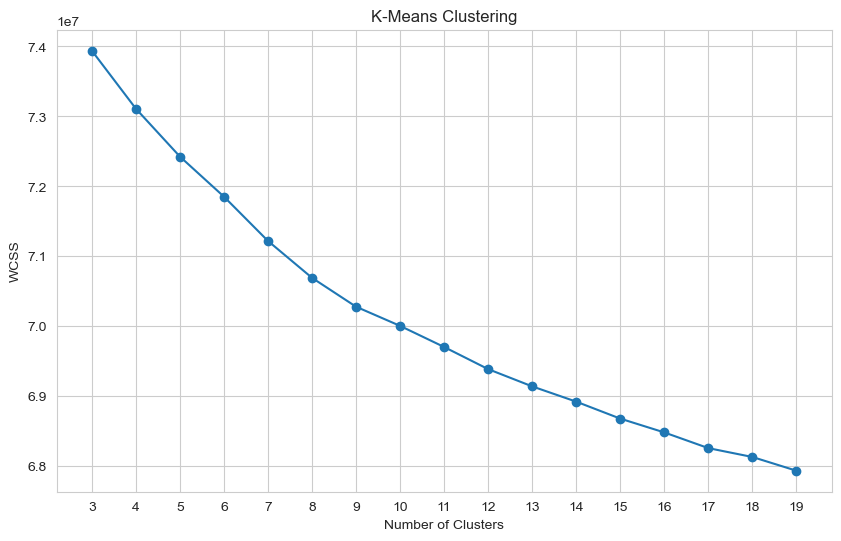

In [10]:
wcss = np.load("../data/wcss.npy")
import seaborn as sns

# Plot the elbow curve
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(search_range, wcss, marker="o")
plt.xticks(search_range)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means Clustering")
plt.savefig("../doc/plots/kmeans_elbow.png")
plt.show()

In [12]:
k = 11
kmeans_sk = KMeans(
        n_clusters=k,
        init="k-means++",
        max_iter=500,
        n_init=10,
        verbose=1).fit(tensor)

In [ ]:
# save the kmeans model
import pickle
with open("../data/kmeans.pkl", "wb") as f:
    pickle.dump(kmeans_sk, f)

# save the cluster labels
np.save("../data/cluster_labels.npy", kmeans_sk.labels_)